<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tidy_data" data-toc-modified-id="Tidy_data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tidy_data</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Tidy-data" data-toc-modified-id="Tidy-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Tidy data</a></span><ul class="toc-item"><li><span><a href="#Exercises" data-toc-modified-id="Exercises-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Exercises</a></span></li></ul></li><li><span><a href="#Pivoting" data-toc-modified-id="Pivoting-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Pivoting</a></span><ul class="toc-item"><li><span><a href="#Longer" data-toc-modified-id="Longer-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Longer</a></span></li><li><span><a href="#Wider" data-toc-modified-id="Wider-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Wider</a></span></li></ul></li></ul></li></ul></div>

# Tidy_data

## Introduction

In [10]:
library(tidyverse) 

In this chapter, you will learn a consistent way to organise your data in R, an organisation called **tidy data**. Getting your data into this format requires some upfront work, but that work pays off in the long term. Once you have tidy data and the tidy tools provided by packages in the tidyverse, you will spend much less time munging data from one representation to another, allowing you to spend more time on the analytic questions at hand.

This chapter will give you a practical introduction to tidy data and the accompanying tools in the **tidyr** package. If you’d like to learn more about the underlying theory, you might enjoy the _Tidy Data_ paper published in the Journal of Statistical Software, http://www.jstatsoft.org/v59/i10/paper.

## Tidy data

You can represent the same underlying data in multiple ways. The example below shows the same data organised in four different ways. Each dataset shows the same values of four variables _country_, _year_, _population_, and _cases_, but each dataset organises the values in a different way.

In [2]:
table1

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [4]:
table2

country,year,type,count
<chr>,<int>,<chr>,<int>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


In [5]:
table3

,country,year,rate
,<chr>,<int>,<chr>
1,Afghanistan,1999,745/19987071
2,Afghanistan,2000,2666/20595360
3,Brazil,1999,37737/172006362
4,Brazil,2000,80488/174504898
5,China,1999,212258/1272915272
6,China,2000,213766/1280428583


In [6]:
table4a

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,745,2666
2,Brazil,37737,80488
3,China,212258,213766


In [7]:
table4b

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,19987071,20595360
2,Brazil,172006362,174504898
3,China,1272915272,1280428583


These are all representations of the same underlying data, but they are not equally easy to use. One dataset, the tidy dataset, will be much easier to work with inside the tidyverse.

There are three interrelated rules which make a dataset tidy:
<font color = 'green'><b>
1.  Each variable must have its own column.
2.  Each observation must have its own row.
3.  Each value must have its own cell.

</b></font>Figure [12.1](https://r4ds.had.co.nz/tidy-data.html#fig:tidy-structure) shows the rules visually.

<img src='pics/tidy-1.png' alt='Drawing' style='width:425pt'/>

These three rules are interrelated because it’s impossible to only satisfy two of the three. That interrelationship leads to an even simpler set of practical instructions:

1.  Put each dataset in a tibble.
2.  Put each variable in a column.

In this example, only `table1` is tidy. It’s the only representation where each column is a variable.

Why ensure that your data is tidy? There are two main advantages:

1.  There’s a general advantage to picking one consistent way of storing
    data. If you have a consistent data structure, it’s easier to learn the
    tools that work with it because they have an underlying uniformity.


2.  There’s a specific advantage to placing variables in columns because
    it allows R’s vectorised nature to shine. As you learned in
    [mutate](https://r4ds.had.co.nz/transform.html#mutate-funs) and [summary functions](https://r4ds.had.co.nz/tidy-data.html#summary-funs), most
    built-in R functions work with vectors of values. That makes transforming
    tidy data feel particularly natural.

dplyr, ggplot2, and all the other packages in the tidyverse are designed to work with tidy data. Here are a couple of small examples showing how you might work with `table1`.

country,year,cases,population,rate
<chr>,<int>,<int>,<int>,<dbl>
Afghanistan,1999,745,19987071,0.372741
Afghanistan,2000,2666,20595360,1.294466
Brazil,1999,37737,172006362,2.193930
Brazil,2000,80488,174504898,4.612363
China,1999,212258,1272915272,1.667495
China,2000,213766,1280428583,1.669488


year,n
<int>,<int>
1999,250740
2000,296920


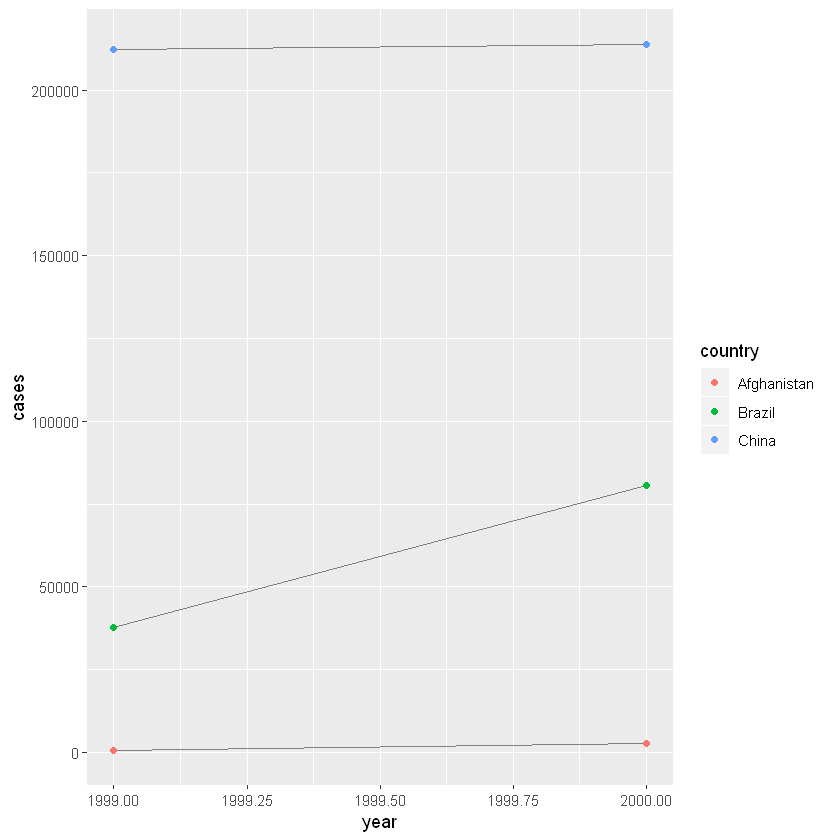

In [9]:
# Compute rate per 10,000
table1 %>% 
  mutate(rate = cases / population * 10000)
#> # A tibble: 6 x 5
#>   country      year  cases population  rate
#>   <chr>       <int>  <int>      <int> <dbl>
#> 1 Afghanistan  1999    745   19987071 0.373
#> 2 Afghanistan  2000   2666   20595360 1.29 
#> 3 Brazil       1999  37737  172006362 2.19 
#> 4 Brazil       2000  80488  174504898 4.61 
#> 5 China        1999 212258 1272915272 1.67 
#> 6 China        2000 213766 1280428583 1.67

# Compute cases per year
table1 %>% 
  count(year, wt = cases)
#> # A tibble: 2 x 2
#>    year      n
#>   <int>  <int>
#> 1  1999 250740
#> 2  2000 296920

# Visualise changes over time
library(ggplot2)
ggplot(table1, aes(year, cases)) + 
  geom_line(aes(group = country), colour = "grey50") + 
  geom_point(aes(colour = country))

### Exercises

1.  Using prose, describe how the variables and observations are organised in
    each of the sample tables.

2.  Compute the `rate` for `table2`, and `table4a` + `table4b`.
    You will need to perform four operations:
    1.  Extract the number of TB cases per country per year.
    2.  Extract the matching population per country per year.
    3.  Divide cases by population, and multiply by 10000.
    4.  Store back in the appropriate place.

    Which representation is easiest to work with? Which is hardest? Why?

3.  Recreate the plot showing change in cases over time using `table2`
    instead of `table1`. What do you need to do first?

## Pivoting

The principles of tidy data seem so obvious that you might wonder if you’ll ever encounter a dataset that isn’t tidy. Unfortunately, however, most data that you will encounter will be untidy. There are two main reasons:

1.  Most people aren’t familiar with the principles of tidy data, and it’s hard
    to derive them yourself unless you spend a _lot_ of time working with data.

2.  Data is often organised to facilitate some use other than analysis. For
    example, data is often organised to make entry as easy as possible.

This means for most real analyses, you’ll need to do some tidying. The first step is always to figure out what the variables and observations are. Sometimes this is easy; other times you’ll need to consult with the people who originally generated the data.
The second step is to resolve one of two common problems:

1.  One variable might be spread across multiple columns.

2.  One observation might be scattered across multiple rows.

Typically a dataset will only suffer from one of these problems; it’ll only suffer from both if you’re really unlucky! To fix these problems, you’ll need the two most important functions in tidyr: `pivot_longer()` and `pivot_wider()`.

###  Longer

<font color = 'blue'>A common problem is a dataset where some of the column names are not names of variables, but _values_ of a variable. Take `table4a`: the column names `1999` and `2000` represent values of the `year` variable, the values in the `1999` and `2000` columns represent values of the `cases` variable, and <b>each row represents two observations, not one</b>.

</font>

```sourceCode
table4a
#> # A tibble: 3 x 3
#>   country     `1999` `2000`
#> * <chr>        <int>  <int>
#> 1 Afghanistan    745   2666
#> 2 Brazil       37737  80488
#> 3 China       212258 213766
```

To tidy a dataset like this, we need to **pivot** the offending columns into a new pair of variables. To describe that operation we need three parameters:

* The set of columns whose names are values, not variables. In this example,
    those are the columns `1999` and `2000`.

* The name of the variable to move the column names to. Here it is `year`.

* The name of the variable to move the column values to. Here it’s `cases`.

Together those parameters generate the call to `pivot_longer()`:


```sourceCode
table4a %>% 
  pivot_longer(c(`1999`, `2000`), names_to = "year", values_to = "cases")
#> # A tibble: 6 x 3
#>   country     year   cases
#>   <chr>       <chr>  <int>
#> 1 Afghanistan 1999     745
#> 2 Afghanistan 2000    2666
#> 3 Brazil      1999   37737
#> 4 Brazil      2000   80488
#> 5 China       1999  212258
#> 6 China       2000  213766
```

The columns to pivot are specified with `dplyr::select()` style notation. Here there are only two columns, so we list them individually. <font color = 'blue'>Note that “1999” and “2000” are non-syntactic names (because they don’t start with a letter) so we have to surround them in backticks</font>. To refresh your memory of the other ways to select columns, see [select](https://r4ds.had.co.nz/transform.html#select).

`year` and `cases` do not exist in `table4a` so we put their names in quotes.

<img src='pics/tidy-9.png' alt='Drawing' style='width:625pt'/>

<font color = 'blue'>In the final result, the pivoted columns are dropped, and we get new `year` and `cases` columns</font>. Otherwise, the relationships between the original variables are preserved. Visually, this is shown in Figure [12.2](https://r4ds.had.co.nz/tidy-data.html#fig:tidy-gather).

* <font color = 'blue'>`pivot_longer()` makes datasets longer by increasing the number of rows and decreasing the number of columns</font>. I don’t believe it makes sense to describe a dataset as being in “long form”. Length is a relative term, and you can only say (e.g.) that dataset A is longer than dataset B.

<b><font color = 'purple'>We can use `pivot_longer()` to tidy `table4b` in a similar fashion. The only difference is the variable stored in the cell values: </font></b>

In [12]:
table4b

table4b %>% 
  pivot_longer(c(`1999`, `2000`), names_to = "year", values_to = "population")

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,19987071,20595360
2,Brazil,172006362,174504898
3,China,1272915272,1280428583


country,year,population
<chr>,<chr>,<int>
Afghanistan,1999,19987071
Afghanistan,2000,20595360
Brazil,1999,172006362
Brazil,2000,174504898
China,1999,1272915272
China,2000,1280428583


To combine the tidied versions of `table4a` and `table4b` into a single tibble, we need to use `dplyr::left_join()`, which you’ll learn about in [relational data](https://r4ds.had.co.nz/relational-data.html#relational-data).

In [14]:
(tidy4a <- table4a %>% 
  pivot_longer(c(`1999`, `2000`), names_to = "year", values_to = "cases"))
(tidy4b <- table4b %>% 
  pivot_longer(c(`1999`, `2000`), names_to = "year", values_to = "population"))
left_join(tidy4a, tidy4b)

country,year,cases
<chr>,<chr>,<int>
Afghanistan,1999,745
Afghanistan,2000,2666
Brazil,1999,37737
Brazil,2000,80488
China,1999,212258
China,2000,213766


country,year,population
<chr>,<chr>,<int>
Afghanistan,1999,19987071
Afghanistan,2000,20595360
Brazil,1999,172006362
Brazil,2000,174504898
China,1999,1272915272
China,2000,1280428583


Joining, by = c("country", "year")



country,year,cases,population
<chr>,<chr>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


### Wider

`pivot_wider()` is the opposite of `pivot_longer()`. You use it when an observation is scattered across multiple rows. For example, take `table2`: an observation is a country in a year, but each observation is spread across two rows.


```sourceCode
table2
#> # A tibble: 12 x 4
#>   country      year type           count
#>   <chr>       <int> <chr>          <int>
#> 1 Afghanistan  1999 cases            745
#> 2 Afghanistan  1999 population  19987071
#> 3 Afghanistan  2000 cases           2666
#> 4 Afghanistan  2000 population  20595360
#> 5 Brazil       1999 cases          37737
#> 6 Brazil       1999 population 172006362
#> # … with 6 more rows
```

To tidy this up, we first analyse the representation in similar way to `pivot_longer()`. This time, however, we only need two parameters:

* The column to take variable names from. Here, it’s `type`.

* The column to take values from. Here it’s `count`.

Once we’ve figured that out, we can use `pivot_wider()`, as shown programmatically below, and visually in Figure [12.3](https://r4ds.had.co.nz/tidy-data.html#fig:tidy-spread).


```sourceCode
table2 %>%
    pivot_wider(names_from = type, values_from = count)
#> # A tibble: 6 x 4
#>   country      year  cases population
#>   <chr>       <int>  <int>      <int>
#> 1 Afghanistan  1999    745   19987071
#> 2 Afghanistan  2000   2666   20595360
#> 3 Brazil       1999  37737  172006362
#> 4 Brazil       2000  80488  174504898
#> 5 China        1999 212258 1272915272
#> 6 China        2000 213766 1280428583
```